In [1]:
!ls ./datasets

dete_survey.csv  tafe_survey.csv


# Dissatisfaction relation to age and service years of employees on public institutions
This proyect have two different data sources: dete_survey and tafe_survey. Each one contains information about the exit surveys conducted to employees that were about to leave and worked either on the Departmente of Education, Training and Employment (DETE dataset) or on the Technical and Further Education (TAFE dataset) in Austalia. 

The two main questions to answer in this analysis are:
- **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**
- **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

Variables to analyse are:
- Age
- Time working in the institution
- Dissatisfaction directly related to working on this two insitutions


## Importing necessary libraries and loading the datasets

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
# reading the datasets
dete_survey = pd.read_csv("datasets/dete_survey.csv")
tafe_survey = pd.read_csv("datasets/tafe_survey.csv")

In [4]:
# Configure pandas to display all the columns of the datasets
pd.options.display.max_columns = 150

## Exploratory analysis

In [5]:
# Head of dete dataset and identifying relevant attributes

# Age (categorical, comes in range)
# Cease Date (Categorical)
# Dete Start Date (Categorical)
# SeparationType (categorical, usefull for selecting only Resignations)
# To determine dissatisfaction with the job, the attributes 'Job dissatisfaction', 'dissatisfaction with the department',
# 'Physical work environment', 'Lack of recognition', 'lack of job security', 'work location', 'employmet conditions',
# 'work life balance' and 'workload' will be used. All of them are booleans (True/False)

# There are null values on the selected attributes that will be used in the analysis
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [7]:
# Head of tafe dataset and indentification of relevant attributes

# LengthofServiceOverall. Overall Length of Service at Institute (in years) (Categorical, comes as a range)
# CurrentAge (categorical)
# Reason for ceasing employment (usefull for selecting only Ressignations)
# Contributing Factors. Dissatisfaction
# Contributing Factors. Job Dissatisfaction

# There are null values on the selected attributes that will be used in the analysis

tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [9]:
# Selecting only the usefull attributes in the dataframes

selected_tafe =  tafe_survey[[
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
    'CurrentAge. Current Age',
    'Reason for ceasing employment',
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction',
]].copy()

print(selected_tafe.info())

selected_dete = dete_survey[[
    'Age',
    'Cease Date',
    'DETE Start Date',
    'SeparationType',
    'Job dissatisfaction',
    'Dissatisfaction with the department',
    'Physical work environment',
    'Lack of recognition',
    'Lack of job security',
    'Work location',
    'Employment conditions',
    'Work life balance', 
    'Workload'
]].copy()

print(selected_dete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
LengthofServiceOverall. Overall Length of Service at Institute (in years)    596 non-null object
CurrentAge. Current Age                                                      596 non-null object
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Dissatisfaction                                        437 non-null object
Contributing Factors. Job Dissatisfaction                                    437 non-null object
dtypes: object(5)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
Age                                    811 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
SeparationType                         822 non-null object
Job dissatisfaction     

## Cleaning Data

### Null values analysis

In [10]:
# A deeper look into the null values by calculating the percent of na values on each attribute

# dete have the most ammount of null values at DETE Start Date, Cease Date and Age 

(selected_dete.isnull().sum()/(selected_dete.shape[0])*100).sort_values(ascending = False)

Age                                    1.3382
Workload                               0.0000
Work life balance                      0.0000
Employment conditions                  0.0000
Work location                          0.0000
Lack of job security                   0.0000
Lack of recognition                    0.0000
Physical work environment              0.0000
Dissatisfaction with the department    0.0000
Job dissatisfaction                    0.0000
SeparationType                         0.0000
DETE Start Date                        0.0000
Cease Date                             0.0000
dtype: float64

In [11]:
# tafe have null values in all the attributes

(selected_tafe.isnull().sum()/(selected_tafe.shape[0])*100).sort_values(ascending = False)

Contributing Factors. Job Dissatisfaction                                    37.749288
Contributing Factors. Dissatisfaction                                        37.749288
CurrentAge. Current Age                                                      15.099715
LengthofServiceOverall. Overall Length of Service at Institute (in years)    15.099715
Reason for ceasing employment                                                 0.142450
dtype: float64

In [12]:
# Some values on the DETE dataset appear as 'Not Stated', but should be treated as null values

selected_dete['DETE Start Date'].value_counts(dropna = False)

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1970          21
1975          21
2013          21
1990          20
2005          20
1996          19
1999          19
2004          18
1991          18
2000          18
1992          18
1989          17
1988          15
2003          15
1976          15
1978          15
2002          15
1995          14
1980          14
1998          14
1997          14
1979          14
1974          14
1993          13
1972          12
1986          12
1977          11
1984          10
2001          10
1969          10
1994          10
1971          10
1981           9
1983           9
1973           8
1985           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64

In [13]:
# Marking null values correctly

print(selected_tafe.isnull().sum().sum())
print(selected_dete.isnull().sum().sum())

selected_dete = selected_dete.replace('Not Stated', np.NaN)

print(selected_tafe.isnull().sum().sum())
print(selected_dete.isnull().sum().sum())


743
11
743
118


### Standarizing and removing characters from column names

In [14]:
# Standarizing names that have the same info in both data sets

map_tafe = {
    'CurrentAge. Current Age': 'age',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'service_length',
    'Reason for ceasing employment' : 'separation_type',
    'Contributing Factors. Dissatisfaction' : 'dissatisfaction',
    'Contributing Factors. Job Dissatisfaction' : 'job_dissatisfaction'
}

map_dete = {
    'SeparationType' : 'separation_type',
}

selected_tafe.rename(map_tafe, axis = 1, inplace = True)
selected_dete.rename(map_dete, axis = 1, inplace = True)


print(selected_tafe.info())
print(selected_dete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
service_length         596 non-null object
age                    596 non-null object
separation_type        701 non-null object
dissatisfaction        437 non-null object
job_dissatisfaction    437 non-null object
dtypes: object(5)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
Age                                    811 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null object
separation_type                        822 non-null object
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environment              822 non-null bool
Lack of recognition                    822 non-null bool
Lack of job security                   822 non-null bool
Work loca

In [15]:
# Removing spaces, converting to lower case and striping white spaces

selected_tafe.columns = selected_tafe.columns.str.lower().str.strip().str.replace(' ', '_')
selected_dete.columns = selected_dete.columns.str.lower().str.strip().str.replace(' ', '_')

print(selected_tafe.info())
print(selected_dete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
service_length         596 non-null object
age                    596 non-null object
separation_type        701 non-null object
dissatisfaction        437 non-null object
job_dissatisfaction    437 non-null object
dtypes: object(5)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
age                                    811 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null object
separation_type                        822 non-null object
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_environment              822 non-null bool
lack_of_recognition                    822 non-null bool
lack_of_job_security                   822 non-null bool
work_loca

In [16]:
# Directing questions only adress people that resign the job, so a new dataframe with this info is created
# for each dataset, but first is necesssary to unify resignations on the dete dataset

print(selected_dete['separation_type'].value_counts())

selected_dete['separation_type'] = selected_dete['separation_type'].str.split('-').str[0]

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64


In [17]:
# Selecting only resignations from both datasets

resignations_dete = selected_dete[selected_dete['separation_type'] == "Resignation"].copy()
resignations_tafe = selected_tafe[selected_tafe['separation_type'] == "Resignation"].copy()

In [18]:
# To create the column of service_length in the dete dataset, it's necessary to extract only the dates from the column
# of cease date

resignations_dete['cease_date'] = resignations_dete['cease_date'].str.split('/').str[-1]

In [19]:
# Converting the values to float 
resignations_dete['cease_date'] = resignations_dete['cease_date'].astype('float')
resignations_dete['dete_start_date'] = resignations_dete['dete_start_date'].astype('float')

In [20]:
# Calculating the service_length column for the dete dataset

resignations_dete['service_length'] = (resignations_dete['cease_date'] - resignations_dete['dete_start_date'])

In [21]:
# looking at outliers in the dete service length dataset
import seaborn as sns
ax = sns.boxplot(x=resignations_dete['service_length'])

In [22]:
# Unifying the dissatisfaction and the job_dissatisfaction attributes on tafe dataset

def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

resignations_tafe['dissatisfied'] = resignations_tafe[['dissatisfaction', 'job_dissatisfaction']].applymap(update_vals).any(1, skipna = False)
resignations_tafe['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
resignations_tafe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 6 columns):
service_length         290 non-null object
age                    290 non-null object
separation_type        340 non-null object
dissatisfaction        332 non-null object
job_dissatisfaction    332 non-null object
dissatisfied           332 non-null object
dtypes: object(6)
memory usage: 18.6+ KB


In [24]:
# Creating the dissatisfied attribute by using all variables available on the dataset
resignations_dete['dissatisfied'] = resignations_dete[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]].any(1, skipna = False)

resignations_dete['dissatisfied'].value_counts(dropna = False)

False    167
True     144
Name: dissatisfied, dtype: int64

In [25]:
resignations_dete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 15 columns):
age                                    306 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
separation_type                        311 non-null object
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_environment              311 non-null bool
lack_of_recognition                    311 non-null bool
lack_of_job_security                   311 non-null bool
work_location                          311 non-null bool
employment_conditions                  311 non-null bool
work_life_balance                      311 non-null bool
workload                               311 non-null bool
service_length                         273 non-null float64
dissatisfied                           311 non-null bool
dtypes: bool(10), float64(3

In [26]:
# Adding columns to identify the origin to each dataset
resignations_dete["origin_dataset"] = "DETE"
resignations_tafe["origin_dataset"] = "TAFE"

In [27]:
# The tafe dataset have the service_length attribute like a range
print(resignations_tafe['service_length'].value_counts())


# The first digit on the interval is extracted with a regex expression
resignations_tafe['service_length'] =  resignations_tafe['service_length'].str.extract(r'(\d+)').astype('float')

# Recheck the values for service_length
print(resignations_tafe['service_length'].value_counts())


Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: service_length, dtype: int64
1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: service_length, dtype: int64


In [28]:
# The ages columns on each dataset don't have the same categories, but it's easy to make them match

print(resignations_tafe['age'].value_counts())
print(resignations_dete['age'].value_counts())

# To make both match, all ages above 56 will be labeled as "56 or older"

def label_old(string):
    if string == "56-60" or string == "61 or older":
        return "56 or older"
    else:
        return string

resignations_dete['age'] = resignations_dete['age'].apply(label_old)

# Then, we remove all double spaces from the tafe dataset and replace them with dashes

resignations_tafe['age'] =  resignations_tafe['age'].str.replace('-', "  ").str.replace("  ", "-")


41  45           45
46  50           39
51-55            39
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
20 or younger     9
Name: age, dtype: int64
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger     1
Name: age, dtype: int64


In [29]:
# Checking that both datasets have the required values

print(resignations_dete.info())
print('-'*10)
print(resignations_tafe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 16 columns):
age                                    306 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
separation_type                        311 non-null object
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_environment              311 non-null bool
lack_of_recognition                    311 non-null bool
lack_of_job_security                   311 non-null bool
work_location                          311 non-null bool
employment_conditions                  311 non-null bool
work_life_balance                      311 non-null bool
workload                               311 non-null bool
service_length                         273 non-null float64
dissatisfied                           311 non-null bool
origin_dataset             

In [30]:
# Checking if its possible to drop null values

# Most null values are on service length and age
print(resignations_tafe.isnull().sum().sort_values(ascending = False))
print(resignations_dete.isnull().sum().sort_values(ascending = False))

# Because of this two columns being directly related to the questions, they won't be filled with the average or mode

age                    50
service_length         50
dissatisfied            8
job_dissatisfaction     8
dissatisfaction         8
origin_dataset          0
separation_type         0
dtype: int64
service_length                         38
dete_start_date                        28
cease_date                             11
age                                     5
origin_dataset                          0
dissatisfied                            0
workload                                0
work_life_balance                       0
employment_conditions                   0
work_location                           0
lack_of_job_security                    0
lack_of_recognition                     0
physical_work_environment               0
dissatisfaction_with_the_department     0
job_dissatisfaction                     0
separation_type                         0
dtype: int64


In [31]:
# Droping the unecessary attributes before merging the datasets

resignations_tafe.drop(["job_dissatisfaction", "dissatisfaction", "separation_type"], axis = 1, inplace = True)
resignations_dete.drop(["dete_start_date", "cease_date", "workload", "work_life_balance"
                       , "employment_conditions", "work_location", "lack_of_job_security",
                       "lack_of_recognition", "physical_work_environment", "dissatisfaction_with_the_department",
                       "job_dissatisfaction", "separation_type"], axis = 1, inplace = True)

print(resignations_dete.info())
print(resignations_tafe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 4 columns):
age               306 non-null object
service_length    273 non-null float64
dissatisfied      311 non-null bool
origin_dataset    311 non-null object
dtypes: bool(1), float64(1), object(2)
memory usage: 10.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 4 columns):
service_length    290 non-null float64
age               290 non-null object
dissatisfied      332 non-null object
origin_dataset    340 non-null object
dtypes: float64(1), object(3)
memory usage: 13.3+ KB
None


In [32]:
# Joining both datasets

combined_resignations = pd.concat([resignations_dete, resignations_tafe], ignore_index = True)
combined_resignations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
age               596 non-null object
dissatisfied      643 non-null object
origin_dataset    651 non-null object
service_length    563 non-null float64
dtypes: float64(1), object(3)
memory usage: 20.4+ KB


/home/dum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# Inspecting null values on the combined dataset

#There are null values on age and service_length
combined_resignations.isnull().sum()

# Most of the rows that don't have a service length are the same that don't have the age (53 out of 55)
combined_resignations[combined_resignations['service_length'].isnull()].isnull().sum()

# Null values are droped given the above fact
print(combined_resignations.info())
combined_resignations.dropna(inplace = True)
print(combined_resignations.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
age               596 non-null object
dissatisfied      643 non-null object
origin_dataset    651 non-null object
service_length    563 non-null float64
dtypes: float64(1), object(3)
memory usage: 20.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 650
Data columns (total 4 columns):
age               561 non-null object
dissatisfied      561 non-null object
origin_dataset    561 non-null object
service_length    561 non-null float64
dtypes: float64(1), object(3)
memory usage: 21.9+ KB
None


In [34]:
# Creation of bins on the service length years

def make_intervals(number):
    if pd.isnull(number):
        return np.nan
    elif number < 3:
        return "New"
    elif  3<= number <= 6:
        return "Experienced"
    elif 7 <= number <= 10:
        return "Established"
    else:
        return "Veteran"

combined_resignations['service_length_intervals'] = combined_resignations['service_length'].apply(make_intervals)
combined_resignations['service_length_intervals'].value_counts()

New            192
Experienced    172
Veteran        135
Established     62
Name: service_length_intervals, dtype: int64

In [35]:
# Forcing the dissatisfied column to booleans
combined_resignations['dissatisfied'] = (combined_resignations['dissatisfied'] == True)

## Data Analysis

In [36]:
# Creating a pivot table with percentage of dissatisfied
dissatisfied_by_service_lengt = combined_resignations.pivot_table(index = 'service_length_intervals'
                                                                  ,values = 'dissatisfied', 
                                                                  aggfunc='mean').sort_values(by = 'dissatisfied')

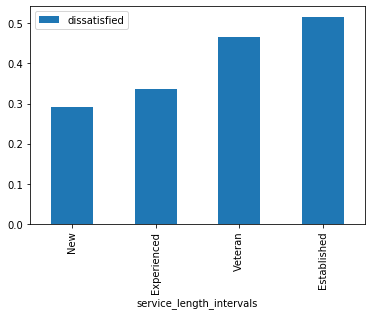

In [37]:
# This shows that there seems to be a coorelation between the service length and the dissatisfaction

dissatisfied_by_service_lengt.plot(kind = 'bar')

In [38]:
# Making a pivot table using age and dissatisfied
dissatisfied_by_age = combined_resignations.pivot_table(index = 'age', values = 'dissatisfied').sort_values(by = 'dissatisfied')
dissatisfied_by_age

,dissatisfied
age,
20 or younger,0.200000
21-25,0.288136
36-40,0.338235
46-50,0.356164
31-35,0.377049
41-45,0.393258
51-55,0.405797
26-30,0.412698
56 or older,0.420290


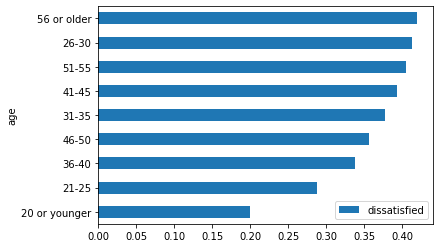

In [39]:
# Ploting dissatisfaction by age

# There seeems to be a clear relation between age an dissatisfaction
dissatisfied_by_age.plot(kind = 'barh')

## Conclusion

There is a clear coorelation between age and dissatisfaction and also between service length and dissatisfaction.

Older employees, or employees with a lot of years on the organization, **are more likely to resign due to dissatisfaction**.